In [1]:
# Algorithm Selected >>> One derivative-free optimization algorithm
# Derivative-Free Algorithm >>> Genetic Algorithm
# 
# Problem >>> Travelling Salesman Problem
# https://en.wikipedia.org/wiki/Travelling_salesman_problem

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import math

In [2]:
# fitness function 
# calculates distance between subsequent nodes in a list

def fitness_function(nodes):
    # list of X and Y values
    coordinates = np.array([(node[1], node[2]) for node in nodes])
    # calculate difference between nodes
    difference = coordinates - np.roll(coordinates, -1, axis=0)
    # calculate distance between nodes
    distance = np.sqrt(np.sum(difference ** 2, axis=1))
    
    # return cummulative distance
    return np.sum(distance)

In [3]:
# population function
# creates a new population by randomising the order of nodes

def create_population(nodes, size):
    # holds newly created populations
    new_population = []
    
    for i in range(size):
        # make a copy of nodes
        individual = nodes.copy()
        # randomise the order of the nodes
        random.shuffle(individual)
        # calculate fitness of newly created individual
        fitness = fitness_function(individual)
        # append fitness/node pairs as a new member of the population
        new_population.append([fitness, individual])
    
    return new_population

In [4]:
# genetic algorithm function
# attempts to increase fitness

def genetic(population, nodes, generation_limit, crossover_rate, mutation_rate, tornament_size):
    # termination criteria (maximum generations)
    for generation in range (generation_limit):
        # gene pool starts off with the two fittest individuals
        gene_pool = [sorted(population)[0], sorted(population)[1]]
        
        # creating the gene pool
        # loop x number of times in order for the gene pool to be the same size as the original population
        for i in range (int((len(population)-2) / 2)):
            
            # check condition  for crossover
            if random.random() < crossover_rate:
                # parent is the 'fittest' from a set list of random individuals
                parent_1 = sorted(random.choices(population, k=tornament_size))[0]
                parent_2 = sorted(random.choices(population, k=tornament_size))[0]
                
                # the children are the results of the crossover function
                child_1, child_2 = crossover(parent_1, parent_2, random.randint(0, len(nodes) - 1))
            else: # if check fails
                child_1 = random.choices(population)[0][1]
                child_2 = random.choices(population)[0][1]
            
            # check condition  for mutation
            if random.random() < mutation_rate:
                # mutate the children
                child_1 = mutate(child_1, random.randint(0, int(len(nodes)-1)), random.randint(0, int(len(nodes)-1)))
                child_2 = mutate(child_2, random.randint(0, int(len(nodes)-1)), random.randint(0, int(len(nodes)-1)))
            
            # append results to gene pool
            gene_pool.append([fitness_function(child_1), child_1])
            gene_pool.append([fitness_function(child_2), child_2])
        
        # gene pool becomes the new population
        population = gene_pool
        
        # print best result of current generation
        print(generation, sorted(population)[0][0])
    
    # return fittest individual
    return sorted(population)[0]             

In [5]:
# mutate function
# mutates an individual by swapping the position of nodes

def mutate(child, pos1, pos2):
    # swap location of two nodes
    child[pos1], child[pos2] = (child[pos2], child[pos1])
    
    return child

In [6]:
# crossover function
# creates new children by using the order of nodes (DNA) of two different parents

def crossover(parent1, parent2, pos):
    
    # keep part of parent1's node order the same
    child1 = parent1[1][0:pos]
    
    # loop through parent2
    for node in parent2[1]:
        # use parent2's node order to fill in missing nodes from child1
        if not (node in child1):
            child1.append(node)
            
    # keep part of parent2's node order the same
    child2 = parent1[1][0:pos]
    
    # loop through parent1
    for node in parent1[1]:
        # use parent1's node order to fill in missing nodes from child2
        if not (node in child2):
            child2.append(node)
            
    # return newly created children
    return child1, child2

In [7]:
# drawing a graph to produce a visual of the solution

def route(node, results):
    # Convert nodes to a numpy array
    nodes = np.array(node)
    
    # Plot the nodes
    plt.plot(nodes[:, 1], nodes[:, 2], "ro")
    for node in nodes:
        plt.annotate(node[0], (node[1], node[2]))
        
    # loop through the nodes in result to draw lines between
    for result in range(len(results[1])):
        # try condition to ignore not in range error
        try:
            node1 = results[1][result]
            node2 = results[1][result + 1]
            # draw line between points
            plt.plot([node1[1], node2[1]], [node1[2], node2[2]], "blue")
        except:
            continue

    # draw final line between first and last node
    node1 = results[1][0]
    node2 = results[1][-1]
    # draw line between points
    plt.plot([node1[1], node2[1]], [node1[2], node2[2]], "blue")

    plt.show()


In [8]:
#To obtain our cities and their given location
df = pd.read_csv("nodes.csv")
df.head(26)

,Node,X,Y
0,1,3,44
1,2,39,45
2,3,11,8
3,3,19,30
4,4,8,33
5,5,8,36
6,6,18,22
7,7,21,32
8,8,3,42
9,9,49,39


In [9]:
# transforming the dataframe values to list form
nodes = df.values.tolist()
print(nodes)

[[1, 3, 44], [2, 39, 45], [3, 11, 8], [3, 19, 30], [4, 8, 33], [5, 8, 36], [6, 18, 22], [7, 21, 32], [8, 3, 42], [9, 49, 39], [10, 17, 40], [11, 13, 19], [12, 6, 16], [13, 21, 20], [14, 18, 49], [15, 10, 33], [16, 33, 23], [17, 13, 11], [18, 25, 47], [19, 27, 42], [20, 18, 44], [21, 18, 21], [22, 42, 45], [23, 40, 20], [24, 2, 12], [25, 26, 33]]


In [10]:
# Key Parameters

POPULATION_SIZE = 2000
GENERATION_LIMIT = 100
CROSSOVER_RATE = 0.9
MUTATION_RATE = 0.6
TORNAMENT_SIZE = 8

# create initial population
start_population = create_population(nodes, POPULATION_SIZE)

result = genetic(start_population, nodes, GENERATION_LIMIT, CROSSOVER_RATE, MUTATION_RATE, TORNAMENT_SIZE)
# print start and final fitness score for comparison
print("\nStart Fitness Score: " + str(sorted(start_population)[0][0]))
print("Final Fitness Score: " + str(result[0]))

0 407.34611074658267
1 393.498657305781
2 381.66329732520484
3 356.39523525098457
4 339.38606004285305
5 339.30185565509936
6 329.19945820424715
7 315.96136990198124
8 305.257147735872
9 282.36029999356737
10 280.62850603091306
11 277.16320811447423
12 269.69959694652385
13 267.5549711685088
14 251.74156764035024
15 251.74156764035024
16 251.5215459692439
17 250.9247573683308
18 241.21813113848816
19 237.35029939515408
20 232.2155197887978
21 225.10333420979907
22 221.77313719333023
23 217.73644763430906
24 217.35044444725685
25 214.68810333555422
26 213.61555642263124
27 208.74358425217747
28 206.3124614859239
29 205.77345869946527
30 201.5465284016288
31 201.5465284016288
32 197.0513630420524
33 197.0513630420524
34 197.0513630420524
35 194.76760592878833
36 193.58362577866563
37 193.58362577866563
38 193.58362577866563
39 193.58362577866563
40 193.58362577866563
41 193.58362577866563
42 193.58362577866563
43 193.58362577866563
44 193.58362577866563
45 193.58362577866563
46 193.58362

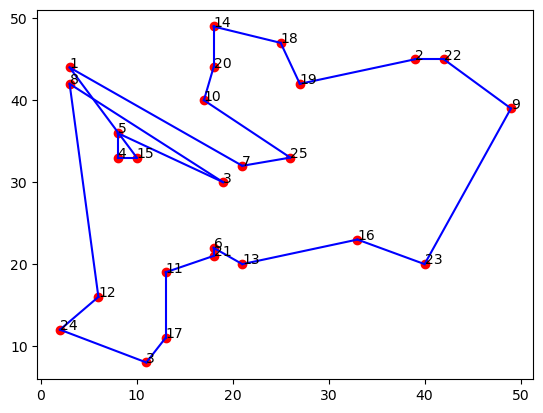

In [34]:
#display graph
route(nodes, result)